In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
def gradient(training_set,w):
    X=np.ones(len(training_set))
    X=np.vstack((X,training_set[:,0]))
    H = X @ X.T
    g= H @ w - X @ training_set[:,1]
    return g

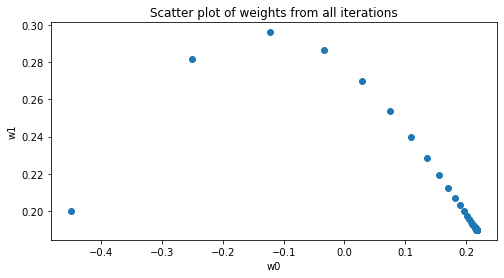

In [3]:
iterations = 50
learn_step = 0.1
training_set=np.array(([-1,-0.1],[0.3,0.5],[2,0.5]))

w=np.array([-0.45,0.2])
w = np.vstack((w,(w-learn_step*gradient(training_set,w)).T))

for i in range(1,iterations-1):  
    w= np.vstack((w,w[i,:] - learn_step*gradient(training_set,w[i,:])))

plt.figure(figsize=(8,4))
ax=plt.subplot(111)
ax.scatter(w[:,0],w[:,1]);
plt.ylabel('w1')
plt.xlabel('w0')
plt.title('Scatter plot of weights from all iterations');

(50,)


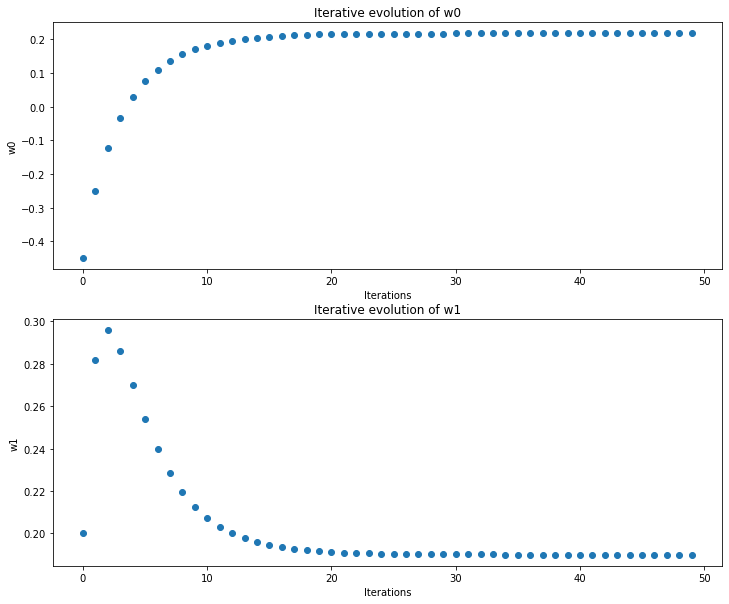

In [4]:
x=np.arange(0,iterations)
w[:,0].shape
print(w[:,0].shape)
plt.figure(figsize=(12,10))
ax=plt.subplot(211)

ax.scatter(x,w[:,0])
plt.ylabel('w0')
plt.xlabel('Iterations')
plt.title('Iterative evolution of w0');

ax=plt.subplot(212)

ax.scatter(x,w[:,1])
plt.ylabel('w1')
plt.xlabel('Iterations')
plt.title('Iterative evolution of w1');

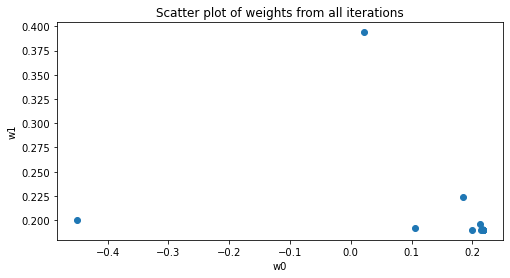

In [5]:
def optimal_step(training_set,w):
    
    X=np.ones(len(training_set))
    X=np.vstack((X,training_set[:,0]))
    H = X @ X.T    
    learn_step = gradient(training_set,w).T @ gradient(training_set,w) / (gradient(training_set,w).T @ H @ gradient(training_set,w))
   
    return learn_step

w=np.array([-0.45,0.2])
w = np.vstack((w,(w-optimal_step(training_set,w)*gradient(training_set,w)).T))

iterat=0

while iterat<iterations and np.linalg.norm(w[iterat+1,:]-w[iterat,:]) > 10**-5:
    w= np.vstack((w,w[iterat+1,:] - optimal_step(training_set,w[iterat+1,:])*gradient(training_set,w[iterat+1,:])))
    iterat +=1
    
plt.figure(figsize=(8,4))
ax=plt.subplot(111)
ax.scatter(w[:,0],w[:,1]);
plt.ylabel('w1')
plt.xlabel('w0')
plt.title('Scatter plot of weights from all iterations');

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


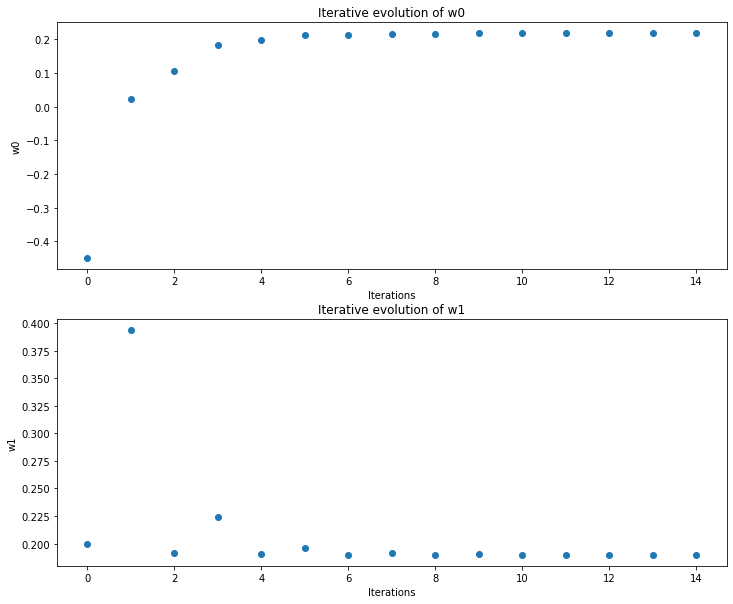

In [6]:
x=np.arange(0,iterat+2)
w[:,0].shape
print(x)
plt.figure(figsize=(12,10))
ax=plt.subplot(211)

ax.scatter(x,w[:,0])
plt.ylabel('w0')
plt.xlabel('Iterations')
plt.title('Iterative evolution of w0');

ax=plt.subplot(212)

ax.scatter(x,w[:,1])
plt.ylabel('w1')
plt.xlabel('Iterations')
plt.title('Iterative evolution of w1');

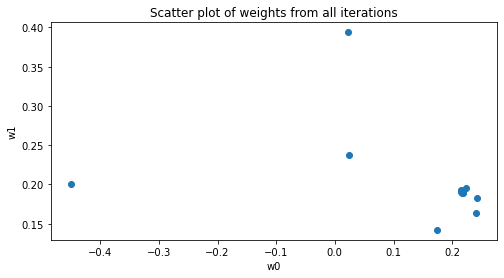

In [7]:
def optimal_conj(training_set,w,d):
    
    X=np.ones(len(training_set))
    X=np.vstack((X,training_set[:,0]))
    H = X @ X.T    
    learn_step = -d.T @ gradient(training_set,w) / (d.T @ H @ d)

    return learn_step

w=np.array([-0.45,0.2])
d=-gradient(training_set,w)
X=np.ones(len(training_set))
X=np.vstack((X,training_set[:,0]))

error_t=np.array([10.0,0.0])
for i in range(0,3):
    error_t[1] += error_t[1] + 0.5*(X[:,i] @ w-training_set[i,1])**2

iterations=50
epoch=1

while np.linalg.norm(error_t[epoch]-error_t[epoch-1]) > 10**-5:
    w = np.vstack((w,np.zeros(2)))

    w[epoch,:] = w[epoch-1,:] + optimal_conj(training_set,w[epoch-1,:],d)*d
    
    error_it=np.array([0.0])
    for i in range(0,3):
        error_it += error_it + 0.5*(X[:,i] @ w[epoch,:]-training_set[i,1])**2
    
    beta = gradient(training_set,w[epoch,:]).T @ gradient(training_set,w[epoch,:]) / (gradient(training_set,w[epoch-1,:]).T @ gradient(training_set,w[epoch-1,:]))
    d = gradient(training_set,w[epoch,:]) + beta*d
    
    error_t = np.append(error_t,error_it)
    epoch += 1

plt.figure(figsize=(8,4))
ax=plt.subplot(111)
ax.scatter(w[:,0],w[:,1]);
plt.ylabel('w1')
plt.xlabel('w0')
plt.title('Scatter plot of weights from all iterations');

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


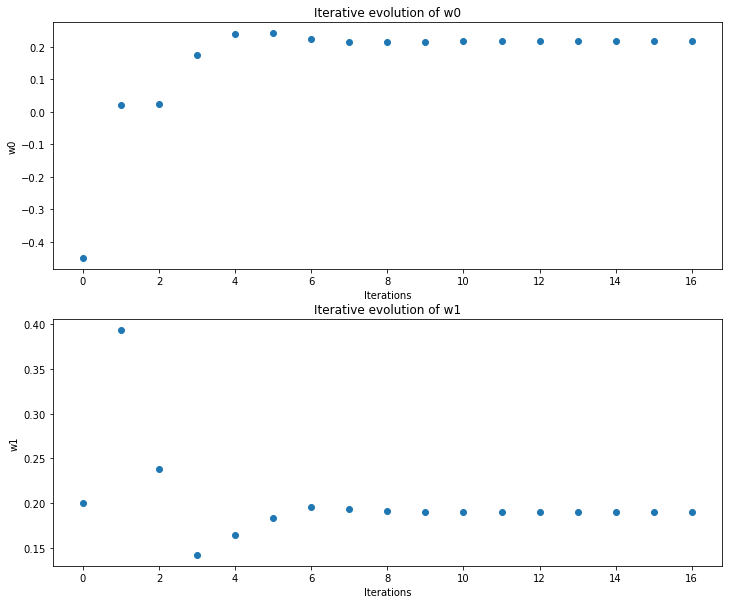

In [8]:
x=np.arange(0,epoch)
w[:,0].shape
print(x)
plt.figure(figsize=(12,10))
ax=plt.subplot(211)

ax.scatter(x,w[:,0])
plt.ylabel('w0')
plt.xlabel('Iterations')
plt.title('Iterative evolution of w0');

ax=plt.subplot(212)

ax.scatter(x,w[:,1])
plt.ylabel('w1')
plt.xlabel('Iterations')
plt.title('Iterative evolution of w1');